Alexander Bae<br>
DATA 71200: Advanced Data Analysis<br>
Prof. Johanna Devaney<br>
2021-06-12<br>

<b>Dataset</b>: [UCI Machine Learning Repository Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)

<h1>Importing Data</h1>

In [2]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

# suppress warnings
warnings.filterwarnings("ignore")

# Obtain load the dataset from the UCI Repository archives
uci_link = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# UCI dataset does not automatically provide headers; manually provide a list of headers for data
abalone_colnames = ['sex', 'shell_length', 'diameter', 'height', 'total_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'] 

# create dataframe using the link data, and the list of column names
abalone_df = pd.read_csv(uci_link, names = abalone_colnames)

<h1>Preparing the Data</h1>

The data was cleaned and prepared in the first part for supervised learning; the same processes will be used for the unsupervised learning portion.  However, PCA will be featured as well this time around.  In addition, the sex column will not be filtered out because we will be attempting to have the algorithm categorize whether an abalone is male, female, or infant given its physical attributes.

In [3]:
# create a column for age
abalone_df['age'] = abalone_df['rings'] + 1.5

# drop the rings column
abalone_df.drop('rings', axis = 1, inplace = True)

In [4]:
# Perform one-hot encoding for the sex column
abalone_df_encoded = pd.get_dummies(abalone_df)

In [30]:
abalone_df_encoded.head()

,shell_length,diameter,height,total_weight,shucked_weight,viscera_weight,shell_weight,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [6]:
# select features to use for PCA
features = ['shell_length', 'diameter', 'height', 'total_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'age']

pca_features = abalone_df_encoded.loc[:, features].values
pca_target = abalone_df_encoded.loc[:,['sex_F', 'sex_I', 'sex_M']]

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

pca_features = ss.fit_transform(pca_features)

In [8]:
# import PCA and instantiate it with two components
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit the model
pc = pca.fit_transform(pca_features)

# transform into a data frame
pc_df = pd.DataFrame(data = pc, columns = ['pc_1', 'pc_2'])

In [9]:
pc_df

,pc_1,pc_2
0,-1.322914,1.795655
1,-3.483651,-0.092832
2,-0.536161,-0.049407
3,-1.458054,0.418640
4,-3.766906,-0.065752
...,...,...
4172,0.858730,0.187821
4173,0.701295,-0.231276
4174,2.033016,-0.693918
4175,1.601240,-0.465751


In [10]:
final_pca = pd.concat([pc_df, abalone_df['sex']], axis = 1)

In [11]:
final_pca

,pc_1,pc_2,sex
0,-1.322914,1.795655,M
1,-3.483651,-0.092832,M
2,-0.536161,-0.049407,F
3,-1.458054,0.418640,M
4,-3.766906,-0.065752,I
...,...,...,...
4172,0.858730,0.187821,F
4173,0.701295,-0.231276,M
4174,2.033016,-0.693918,M
4175,1.601240,-0.465751,F


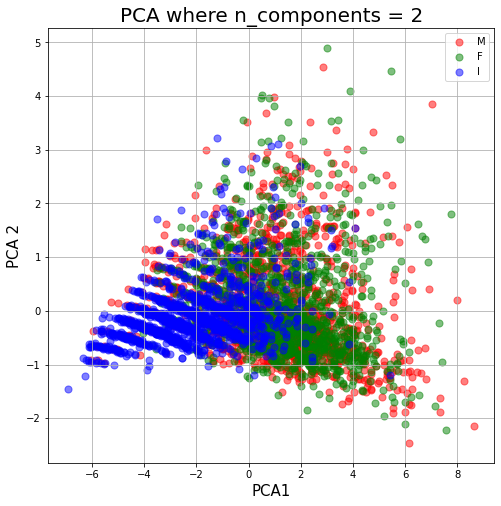

In [12]:
# create the plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
ax.set_title('PCA where n_components = 2', fontsize = 20)
targets = ['M', 'F', 'I']
color = ['r', 'g', 'b']
for target, color in zip(targets,color):
    indices = final_pca['sex'] == target
    ax.scatter(final_pca.loc[indices, 'pc_1'] , final_pca.loc[indices, 'pc_2'] , c = color, s = 50, alpha=0.5)
ax.legend(targets)
ax.grid()

In [45]:
pca.explained_variance_ratio_

array([0.83905489, 0.08695162])

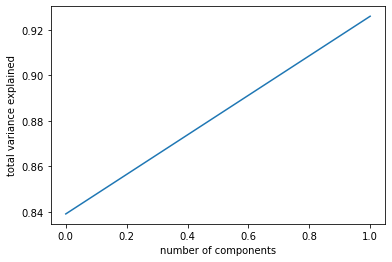

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('total variance explained')
plt.show()

We see above that the PCA for feature #1 accounts for about 84% of the variance, and that feature #2 accounts for about 8.7% of the variance.  Together, this accounts for 92.7% of the variance.  There seems to be considerable overlap between the classes, which does not bode well for models such as KNN because of their reliance on the Euclidean distance as a measure.

In [13]:
# instantiate a PCA that allows for 3 components

pca_3 = PCA(n_components = 3)

# fit the model
pc_3 = pca_3.fit_transform(pca_features)

# transform into a data frame
pc_3_df = pd.DataFrame(data = pc_3, columns = ['pc_1', 'pc_2', 'pc_3'])

In [14]:
final_pca_3 = pd.concat([pc_3_df, abalone_df['sex']], axis = 1)

In [15]:
pca_3.explained_variance_ratio_

array([0.83905489, 0.08695162, 0.03230539])

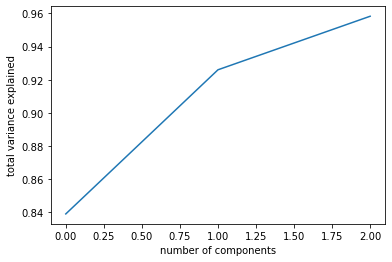

In [16]:
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('total variance explained')
plt.show()

Using a PCA model where n_components = 3, we see that in addition to the two principal components accounting for 92.7% of the variance, the addition of the third principal component accounts for another 3.2% of the variance, bringing the total up to 95.9% of the variance.

The supervised learning models cannot be compared with the PCA and unsupervised learning models, because different targets are being predicted.  In the supervised learning algorithm models, the target attribute was a physical size.  With PCA and unsupervised learning models, we are attempting to predict the sex of the abalone.

<h1>Unsupervised Learning Models</h1>

In [22]:
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import silhouette_score as s_score

<h3>K-Nearest Neighbors (No PCA)</h3>

In [17]:
# split the data
no_pca_X_train, no_pca_X_test, no_pca_y_train, no_pca_y_test = train_test_split(abalone_df[features], abalone_df['sex'],
                                                                                test_size=0.20, random_state=42)

In [18]:
# standardize the data
ss.fit(no_pca_X_train)

no_pca_X_train = ss.transform(no_pca_X_train)
no_pca_X_test = ss.transform(no_pca_X_test)

In [70]:
# import and instantiate KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

# fit the model to the training set
knn.fit(no_pca_X_train, no_pca_y_train)

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [20]:
# predict using the model on the test set
no_pca_y_pred = knn.predict(no_pca_X_test)

In [37]:
# confusion matrix and evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(no_pca_y_test, no_pca_y_pred))

[[120  42 100]
 [ 31 205  31]
 [131  51 125]]


In [128]:
print(classification_report(no_pca_y_test, no_pca_y_pred))

              precision    recall  f1-score   support

           F       0.43      0.46      0.44       262
           I       0.69      0.77      0.73       267
           M       0.49      0.41      0.44       307

    accuracy                           0.54       836
   macro avg       0.53      0.54      0.54       836
weighted avg       0.53      0.54      0.53       836



In [30]:
print(ari(no_pca_y_test, no_pca_y_pred))
print(s_score(no_pca_X_test, no_pca_y_test, metric='euclidean'))

0.17235974455266373
0.057927812579689396


<h3>K-Nearest Neighbors (with PCA)</h3>

In [31]:
pca_X = final_pca_3[['pc_1', 'pc_2', 'pc_3']]
pca_y = final_pca_3['sex']

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, pca_y,
                                                                                test_size=0.20, random_state=42)

In [32]:
ss.fit(pca_X_train)

pca_X_train = ss.transform(pca_X_train)
pca_X_test = ss.transform(pca_X_test)

In [33]:
knn.fit(pca_X_train, pca_y_train)

KNeighborsClassifier()

In [34]:
# predict using the model on the test set
pca_y_pred = knn.predict(pca_X_test)

In [38]:
print(confusion_matrix(pca_y_test, pca_y_pred))

[[126  36 100]
 [ 31 200  36]
 [125  56 126]]


In [39]:
print(classification_report(pca_y_test, pca_y_pred))

              precision    recall  f1-score   support

           F       0.45      0.48      0.46       262
           I       0.68      0.75      0.72       267
           M       0.48      0.41      0.44       307

    accuracy                           0.54       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.54      0.54       836



In [40]:
# Adjusted Random Index scoring
print(ari(pca_y_test, pca_y_pred))
print(s_score(pca_X_test, pca_y_test, metric='euclidean'))

0.16414393422034962
0.0532622829911793


As we can see from the results of both KNN models, KNN was not an ideal model for the dataset given how much overlap there was between groups.  However, of the three classes, it was able to distinguish infant abalone with the highest degree of precision, recall, and accuracy.

<h3>Aggolmerate/Hierarchal (no PCA)</h3>

In [48]:
from sklearn.preprocessing import normalize
normalized_abalone = normalize(abalone_df.drop('sex', axis=1))
normalized_abalone = pd.DataFrame(normalized_abalone, columns=abalone_df.drop('sex', axis=1).columns)
normalized_abalone.head()

,shell_length,diameter,height,total_weight,shucked_weight,viscera_weight,shell_weight,age
0,0.027541,0.022093,0.005750,0.031112,0.013589,0.006113,0.009079,0.998723
1,0.041100,0.031119,0.010569,0.026480,0.011684,0.005695,0.008220,0.998145
2,0.050234,0.039808,0.012796,0.064167,0.024312,0.013412,0.019904,0.995210
3,0.038161,0.031656,0.010841,0.044753,0.018690,0.009887,0.013443,0.997393
4,0.038761,0.029951,0.009396,0.024079,0.010512,0.004640,0.006460,0.998378


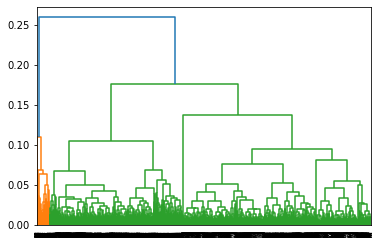

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

mergings = linkage(normalized_abalone.values, method='complete')

dendrogram(mergings,
           labels=abalone_df['sex'].values,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [46]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 1, criterion='distance')

label_df = pd.DataFrame({'labels':labels, 'sex':abalone_df['sex'].values })
ct = pd.crosstab(label_df['labels'], label_df['sex'])

print(ct)

sex        F     I     M
labels                  
1       1307  1342  1528


In [52]:
# Hierarchal clustering
from sklearn.cluster import AgglomerativeClustering 

agg = AgglomerativeClustering(n_clusters = 3)

y_hc = agg.fit_predict(normalized_abalone.values)

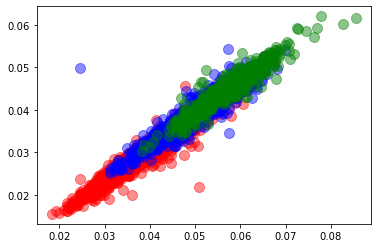

In [53]:
plt.scatter(normalized_abalone.values[y_hc==0, 0], 
            normalized_abalone.values[y_hc==0, 1], s=100, c='red', label ='Cluster 1', alpha=0.45)
plt.scatter(normalized_abalone.values[y_hc==1, 0], 
            normalized_abalone.values[y_hc==1, 1], s=100, c='blue', label ='Cluster 2', alpha=0.45)
plt.scatter(normalized_abalone.values[y_hc==2, 0], 
            normalized_abalone.values[y_hc==2, 1], s=100, c='green', label ='Cluster 3', alpha=0.45)
plt.show()

In [57]:
print(ari(labels, y_hc))
print(s_score(normalized_abalone, y_hc, metric='euclidean'))

0.0
0.4488564057388


<h3>Aggolmerate/Hierarchal (with PCA)</h3>

In [61]:
normalized_pca_df = normalize(pc_df)
normalized_pca_df = pd.DataFrame(normalized_pca_df, columns=pc_df.columns)

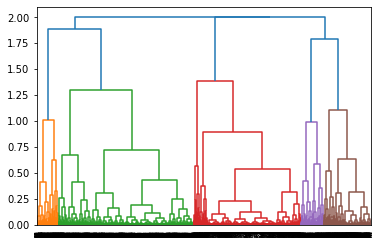

In [59]:
# dendrogram
mergings_pca = linkage(normalized_pca_df.values, method='complete')

dendrogram(mergings_pca,
           labels=abalone_df['sex'].values,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [65]:
labels_pca = fcluster(mergings_pca, 1, criterion='distance')

label_pca_df = pd.DataFrame({'labels':labels_pca, 'sex':abalone_df['sex'].values })
ct_pca = pd.crosstab(label_pca_df['labels'], label_df['sex'])

print(ct_pca)

sex       F    I    M
labels               
1        59   20   85
2        47   19   44
3       183   43  179
4       585   65  635
5        24   24   26
6       113  925  225
7       115   41  127
8        52   35   51
9       129  170  156


In [63]:
# Hierarchal clustering for PCA
y_hc_pca = agg.fit_predict(normalized_pca_df.values)

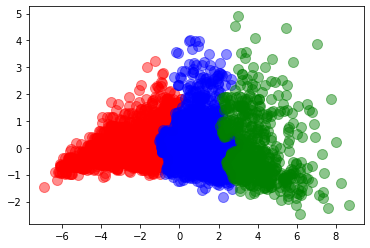

In [87]:
plt.scatter(normalized_pc_df.values[y_hc==0, 0], 
            normalized_pc_df.values[y_hc==0, 1], s=100, c='red', label ='Cluster 1', alpha=0.45)
plt.scatter(normalized_pc_df.values[y_hc==1, 0], 
            normalized_pc_df.values[y_hc==1, 1], s=100, c='blue', label ='Cluster 2', alpha=0.45)
plt.scatter(normalized_pc_df.values[y_hc==2, 0], 
            normalized_pc_df.values[y_hc==2, 1], s=100, c='green', label ='Cluster 3', alpha=0.45)
plt.show()

In [66]:
print(ari(labels_pca, y_hc_pca))
print(s_score(normalized_pca_df, y_hc_pca, metric='euclidean'))

0.5342698722914287
0.6394481194474759


We can see that the PCA applied data worked much better with Hierarchal Agglomerative Clustering compared to the dataset that did not apply PCA.

<h3>DBScan (no PCA)</h3>

In [67]:
from sklearn.cluster import DBSCAN

# eps using a default of 0.5, min_samples using a default of 5
dbscan = DBSCAN()

pca_features_df = pd.DataFrame(data = pca_features, columns = features)

In [68]:
dbscan.fit(pca_features_df)
db_labels = dbscan.labels_

In [69]:
# Find out the number of clusters and noise levels
no_clusters = len(np.unique(db_labels) )
no_noise = np.sum(np.array(db_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 7
Estimated no. of noise points: 781


In [74]:
clust = dbscan.fit_predict(pca_features_df)

In [85]:
print(ari(db_labels, clust))
print(s_score(pca_features_df, db_labels))

1.0
-0.2859227404501033


<h3>DBScan (with PCA)</h3>

In [87]:
dbscan.fit(pc_df)
pca_db_labels = dbscan.labels_

In [107]:
# Find out the number of clusters and noise levels
pca_no_clusters = len(np.unique(pca_db_labels) )
pca_no_noise = np.sum(np.array(pca_db_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % pca_no_clusters)
print('Estimated no. of noise points: %d' % pca_no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 35


Immediately we notice that the PCA cuts down on cluster groups, and the amount of noise generated.

In [86]:
pca_clust = dbscan.fit_predict(pc_df)

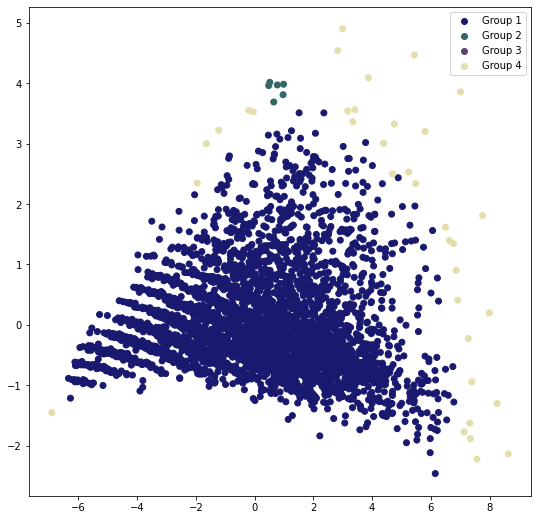

In [117]:
colors = {}
colors[0] = '#191970'
colors[1] = '#336666'
colors[2] = '#5e4474'
colors[-1] = '#e4deac'
  
# Building the colour vector for each data point
palette = [colors[label] for label in pca_db_labels]

# For the construction of the legend of the plot
cluster_1 = plt.scatter(pc_df['pc_1'], pc_df['pc_2'], color = '#191970');
cluster_2 = plt.scatter(pc_df['pc_1'], pc_df['pc_2'], color = '#336666');
cluster_3 = plt.scatter(pc_df['pc_1'], pc_df['pc_2'], color ='#5e4474');
cluster_4 = plt.scatter(pc_df['pc_1'], pc_df['pc_2'], color = '#e4deac');

plt.figure(figsize =(9, 9))
plt.scatter(pc_df['pc_1'], pc_df['pc_2'], c = palette)
plt.legend((cluster_1, cluster_2, cluster_3, cluster_4), ('Group 1', 'Group 2', 'Group 3', 'Group 4'))
plt.show()

Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.

k-Means (use an elbow visualization to determine the optimal numbers of clusters)
Aggolmerate/Hierarchical
DBSCAN

In [89]:
print(ari(pca_db_labels, pca_clust))
print(s_score(pc_df, pca_db_labels))

1.0
0.28229931018682536
